In [1]:
import wikipedia as wk
import re
from IPython.core.display import clear_output

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
plt.style.use('ggplot')

## Load dataframe

In [3]:
# raw_data
file = '04_clean_data.csv'
data_directory = os.path.join( '..','data','raw_data/{}'.format(file))

In [4]:
df= pd.read_csv(data_directory)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
name          244 non-null object
title         244 non-null object
summary       244 non-null object
year          244 non-null int64
transcript    244 non-null object
link          244 non-null object
dtypes: int64(1), object(5)
memory usage: 11.5+ KB


In [6]:
df.head()

,name,title,summary,year,transcript,link
0,Enissa Amani,Ehrenwort,"Live from Hamburg, Iranian-German comedian Eni...",2018,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s...",https://scrapsfromtheloft.com/2019/02/19/eniss...
1,George Carlin,Politically Correct Language By,George Carlin's critical thinking on pc langua...,0,"I know I’m a little late with this, but I’d li...",https://scrapsfromtheloft.com/2019/02/18/polit...
2,Ken Jeong,"You Complete Me, Ho",Filmed at the Ice House Comedy Club in Pasaden...,2019,The Hangover… Community… Dr. Ken… Crazy Rich A...,https://scrapsfromtheloft.com/2019/02/17/ken-j...
3,Ray Romano,"Right Here, Around The Corner",Ray Romano cut his stand-up teeth at the Comed...,2019,It’s been 23 years since I did a comedy specia...,https://scrapsfromtheloft.com/2019/02/12/ray-r...
4,Gabriel Iglesias,One Show Fits All,"In a new special from Houston, Gabriel ""Fluffy...",2019,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,https://scrapsfromtheloft.com/2019/01/30/gabri...


## Get len of transcript

In [7]:
df['len_transcript'] = df.transcript.str.len()

In [8]:
df.len_transcript.describe()

count      244.000000
mean     45534.975410
std      16696.294783
min       2491.000000
25%      39536.750000
50%      47981.500000
75%      56218.500000
max      86391.000000
Name: len_transcript, dtype: float64

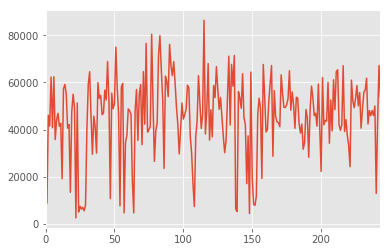

In [9]:
df.len_transcript.plot()

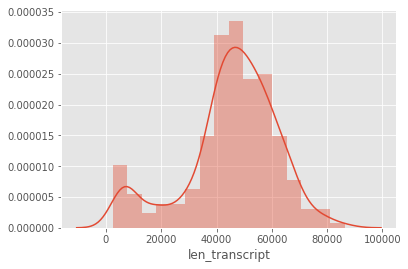

In [10]:
sns.distplot(df.len_transcript)

## drop any transcripts < 20000

In [11]:
large_transcripts = df.len_transcript> 20000

In [12]:
df = df[large_transcripts]

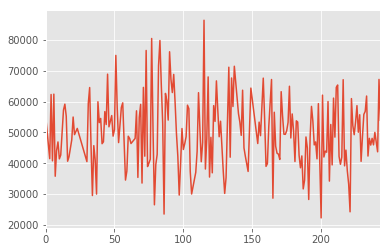

In [13]:
df.len_transcript.plot()

In [14]:
df.len_transcript.describe()

count      217.000000
mean     49978.843318
std      11443.140240
min      22237.000000
25%      42004.000000
50%      48780.000000
75%      57686.000000
max      86391.000000
Name: len_transcript, dtype: float64

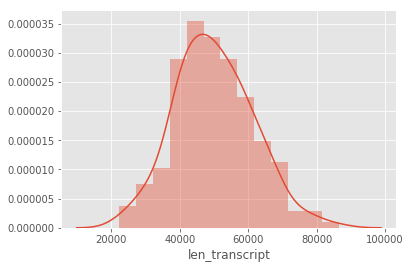

In [15]:
sns.distplot(df.len_transcript)

In [16]:
df.head()

,name,title,summary,year,transcript,link,len_transcript
0,Enissa Amani,Ehrenwort,"Live from Hamburg, Iranian-German comedian Eni...",2018,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s...",https://scrapsfromtheloft.com/2019/02/19/eniss...,55660
2,Ken Jeong,"You Complete Me, Ho",Filmed at the Ice House Comedy Club in Pasaden...,2019,The Hangover… Community… Dr. Ken… Crazy Rich A...,https://scrapsfromtheloft.com/2019/02/17/ken-j...,46046
3,Ray Romano,"Right Here, Around The Corner",Ray Romano cut his stand-up teeth at the Comed...,2019,It’s been 23 years since I did a comedy specia...,https://scrapsfromtheloft.com/2019/02/12/ray-r...,41464
4,Gabriel Iglesias,One Show Fits All,"In a new special from Houston, Gabriel ""Fluffy...",2019,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,https://scrapsfromtheloft.com/2019/01/30/gabri...,62291
5,Sebastian Maniscalco,Stay Hungry,Sebastian's captivating storytelling keeps the...,2019,[instrumental music plays] ♪ All right ♪ [scre...,https://scrapsfromtheloft.com/2019/01/29/sebas...,40766


## Extract DOB from wikipedia

In [17]:
def get_bday_wiki_rx(data):
    pat = r'(\d{2}\s[A-z]+\s|[A-z]+\s\d{2},?\s)?\d{4}'
    pattern = re.compile(pat,re.IGNORECASE|re.VERBOSE)
    name = data['name']
    print('bday extraction: {}'.format(name))
    clear_output(wait = True)
    try:
        page = wk.page(name)
        summary = page.summary
        result = pattern.search(page.summary).group()
        return result
    except:
        print('Some error.')

In [18]:
%%time
df['dob'] = df.apply(get_bday_wiki_rx,axis=1)

CPU times: user 8.12 s, sys: 3.19 s, total: 11.3 s
Wall time: 3min 35s


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 243
Data columns (total 8 columns):
name              217 non-null object
title             217 non-null object
summary           217 non-null object
year              217 non-null int64
transcript        217 non-null object
link              217 non-null object
len_transcript    217 non-null int64
dob               214 non-null object
dtypes: int64(2), object(6)
memory usage: 15.3+ KB


In [20]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob
0,Enissa Amani,Ehrenwort,"Live from Hamburg, Iranian-German comedian Eni...",2018,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s...",https://scrapsfromtheloft.com/2019/02/19/eniss...,55660,1981
2,Ken Jeong,"You Complete Me, Ho",Filmed at the Ice House Comedy Club in Pasaden...,2019,The Hangover… Community… Dr. Ken… Crazy Rich A...,https://scrapsfromtheloft.com/2019/02/17/ken-j...,46046,"July 13, 1969"
3,Ray Romano,"Right Here, Around The Corner",Ray Romano cut his stand-up teeth at the Comed...,2019,It’s been 23 years since I did a comedy specia...,https://scrapsfromtheloft.com/2019/02/12/ray-r...,41464,"December 21, 1957"
4,Gabriel Iglesias,One Show Fits All,"In a new special from Houston, Gabriel ""Fluffy...",2019,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,https://scrapsfromtheloft.com/2019/01/30/gabri...,62291,"July 15, 1976"
5,Sebastian Maniscalco,Stay Hungry,Sebastian's captivating storytelling keeps the...,2019,[instrumental music plays] ♪ All right ♪ [scre...,https://scrapsfromtheloft.com/2019/01/29/sebas...,40766,1973


## Check null values

In [22]:
df.apply(lambda x: sum(x.isnull()))

name              0
title             0
summary           0
year              0
transcript        0
link              0
len_transcript    0
dob               3
dtype: int64

In [23]:
df[df.isnull().any(axis=1)]

,name,title,summary,year,transcript,link,len_transcript,dob
14,Jeff Foxworthylarry The Cable Guy,We’Ve Been Thinking,Comedians Jeff Foxworthy and Larry the Cable G...,2016,When you start doing what Jeff and I do this i...,https://scrapsfromtheloft.com/2018/10/28/jeff-...,59162,None
44,Deray Davis,How To Act Black,Dynamic comic DeRay Davis hits the stage like ...,2017,"[male announcer] ATL, get ready for the man of...",https://scrapsfromtheloft.com/2018/07/18/deray...,52546,None
147,Erik Griffin,The Ugly Truth,Erik Griffin’s performance at The Laugh Factor...,2017,"Ladies and gentlemen, live from Laugh Factory ...",https://scrapsfromtheloft.com/2017/10/08/erik-...,37321,None


### Fix dob


In [24]:
# fix name
df.loc[14, 'name'] = 'Jeff Foxworthy'

In [25]:
# JEff Foxworthy
df.loc[14, 'dob'] = 'September 6, 1958'
# Deray Davis
df.loc[44, 'dob'] = 'February 26, 1968'
# Erik Griffin
df.loc[147, 'dob'] = 'March 26, 1976'

In [26]:
# check again for nulls
df.apply(lambda x: sum(x.isnull()))

name              0
title             0
summary           0
year              0
transcript        0
link              0
len_transcript    0
dob               0
dtype: int64

In [27]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob
0,Enissa Amani,Ehrenwort,"Live from Hamburg, Iranian-German comedian Eni...",2018,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s...",https://scrapsfromtheloft.com/2019/02/19/eniss...,55660,1981
2,Ken Jeong,"You Complete Me, Ho",Filmed at the Ice House Comedy Club in Pasaden...,2019,The Hangover… Community… Dr. Ken… Crazy Rich A...,https://scrapsfromtheloft.com/2019/02/17/ken-j...,46046,"July 13, 1969"
3,Ray Romano,"Right Here, Around The Corner",Ray Romano cut his stand-up teeth at the Comed...,2019,It’s been 23 years since I did a comedy specia...,https://scrapsfromtheloft.com/2019/02/12/ray-r...,41464,"December 21, 1957"
4,Gabriel Iglesias,One Show Fits All,"In a new special from Houston, Gabriel ""Fluffy...",2019,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,https://scrapsfromtheloft.com/2019/01/30/gabri...,62291,"July 15, 1976"
5,Sebastian Maniscalco,Stay Hungry,Sebastian's captivating storytelling keeps the...,2019,[instrumental music plays] ♪ All right ♪ [scre...,https://scrapsfromtheloft.com/2019/01/29/sebas...,40766,1973


In [28]:
# change to datetime
df.dob = pd.to_datetime(df.dob)

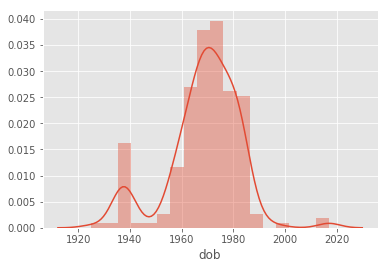

In [40]:
sns.distplot(df.dob.dt.year)

## Check who was born after 1990's

In [45]:
yr_filter = df.dob.dt.year> 1990

In [46]:
df[yr_filter]

,name,title,summary,year,transcript,link,len_transcript,dob
11,Vir Das,Losing It,"The world's got a lot of problems, but Vir Das...",2018,I lost 80% of my mind. It’s very freeing. You ...,https://scrapsfromtheloft.com/2018/12/15/vir-d...,42632,2017-01-01
33,Bert Kreischer,Secret Time,Bert regales the audience at the Trocadero The...,2018,[applause] [male presenter] Ladies and gentlem...,https://scrapsfromtheloft.com/2018/08/25/bert-...,45515,1997-01-01
67,Adel Karam,Live From Beirut,Adel Karam goes back to his hometown to appear...,2018,A NETFLIX COMEDY SPECIAL\nRecorded at the Casi...,https://scrapsfromtheloft.com/2018/03/12/adel-...,35384,2017-01-01


## Fix it

In [48]:
# Vir Das	
# May 31, 1979
df.loc[11, 'dob'] = 'May 31, 1979'

# Adel Karam
# August 20, 1972
df.loc[67, 'dob'] = 'August 20, 1972'

In [49]:
df[yr_filter]

,name,title,summary,year,transcript,link,len_transcript,dob
11,Vir Das,Losing It,"The world's got a lot of problems, but Vir Das...",2018,I lost 80% of my mind. It’s very freeing. You ...,https://scrapsfromtheloft.com/2018/12/15/vir-d...,42632,"May 31, 1979"
33,Bert Kreischer,Secret Time,Bert regales the audience at the Trocadero The...,2018,[applause] [male presenter] Ladies and gentlem...,https://scrapsfromtheloft.com/2018/08/25/bert-...,45515,1997-01-01 00:00:00
67,Adel Karam,Live From Beirut,Adel Karam goes back to his hometown to appear...,2018,A NETFLIX COMEDY SPECIAL\nRecorded at the Casi...,https://scrapsfromtheloft.com/2018/03/12/adel-...,35384,"August 20, 1972"


In [51]:
# change dob againt to datetime
df.dob = pd.to_datetime(df.dob)

In [54]:
df[yr_filter]

,name,title,summary,year,transcript,link,len_transcript,dob
11,Vir Das,Losing It,"The world's got a lot of problems, but Vir Das...",2018,I lost 80% of my mind. It’s very freeing. You ...,https://scrapsfromtheloft.com/2018/12/15/vir-d...,42632,1979-05-31
33,Bert Kreischer,Secret Time,Bert regales the audience at the Trocadero The...,2018,[applause] [male presenter] Ladies and gentlem...,https://scrapsfromtheloft.com/2018/08/25/bert-...,45515,1997-01-01
67,Adel Karam,Live From Beirut,Adel Karam goes back to his hometown to appear...,2018,A NETFLIX COMEDY SPECIAL\nRecorded at the Casi...,https://scrapsfromtheloft.com/2018/03/12/adel-...,35384,1972-08-20


## Find age when special was recorded

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 243
Data columns (total 8 columns):
name              217 non-null object
title             217 non-null object
summary           217 non-null object
year              217 non-null int64
transcript        217 non-null object
link              217 non-null object
len_transcript    217 non-null int64
dob               217 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 25.3+ KB


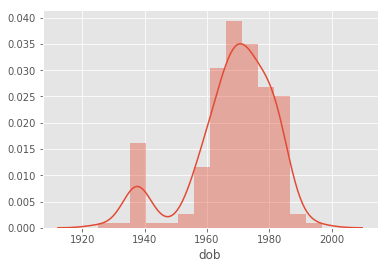

In [56]:
sns.distplot(df.dob.dt.year)

In [58]:
df['age_when_recorded'] = df.year - df.dob.dt.year

In [59]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob,age_when_recorded
0,Enissa Amani,Ehrenwort,"Live from Hamburg, Iranian-German comedian Eni...",2018,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s...",https://scrapsfromtheloft.com/2019/02/19/eniss...,55660,1981-01-01,37
2,Ken Jeong,"You Complete Me, Ho",Filmed at the Ice House Comedy Club in Pasaden...,2019,The Hangover… Community… Dr. Ken… Crazy Rich A...,https://scrapsfromtheloft.com/2019/02/17/ken-j...,46046,1969-07-13,50
3,Ray Romano,"Right Here, Around The Corner",Ray Romano cut his stand-up teeth at the Comed...,2019,It’s been 23 years since I did a comedy specia...,https://scrapsfromtheloft.com/2019/02/12/ray-r...,41464,1957-12-21,62
4,Gabriel Iglesias,One Show Fits All,"In a new special from Houston, Gabriel ""Fluffy...",2019,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,https://scrapsfromtheloft.com/2019/01/30/gabri...,62291,1976-07-15,43
5,Sebastian Maniscalco,Stay Hungry,Sebastian's captivating storytelling keeps the...,2019,[instrumental music plays] ♪ All right ♪ [scre...,https://scrapsfromtheloft.com/2019/01/29/sebas...,40766,1973-01-01,46


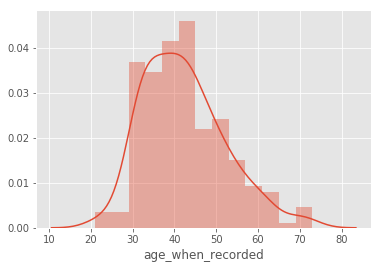

In [60]:
sns.distplot(df.age_when_recorded)

## Save

In [61]:
# raw_data
file = '05_clean_data.csv'
data_directory = os.path.join( '..','data','raw_data/{}'.format(file))

In [62]:
df.to_csv(data_directory,index=False)